# Profiles

Let $X$ be a set of alternatives, or candidates,  and $V$ a set of voters.   

We consider elections in which each voters submits a ranking of all the candidates.   In this paper, we assume that a ballot is a strict linear order. For a set $X$, let $\mathcal{L}(X)$ be the set of all strict linear orders on $X$. 

A **profile** for $(V, X)$ is a function $\mathbf{P}: V\to \mathcal{L}(X)$.   We write $V(\mathbf{P})$ for the set $V$ of voters in the profile $\mathbf{P}$ and $X(\mathbf{P})$ for set $X$ of candidates in $\mathbf{P}$.  We call $\mathbf{P}(i)$ voter $i$'s **ballot** and write "$a\mathbf{P}_ib$" for $(a,b)\in \mathbf{P}(i)$.

Profiles are defined using the Profile class defined in `voting/profiles.py`.  This notebook describes the Profile class. 

In [1]:
# import the Profile class

from voting.profiles import Profile

# Note: this module requires: numpy, numba, networkx, and tabulate

A Profile is defined from two parameters: 

1. A list of rankings, where each ranking is a tuple or list of the candidates
2. The number of candidates

In [2]:
rankings = [
    (0, 1, 2), 
    (2, 1, 0), 
    (1, 2, 0)
]
num_cands = 3
prof = Profile(rankings, num_cands)
print(f"There are {prof.num_voters} voters in the profile.")

# display prof  - the header is the number of voters with each ranking
prof.display()

# When displaying a profile, we display the *anonymous* profile giving the number of 
# voters that have each ballot. 

There are 3 voters in the profile.
+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| 0 | 2 | 1 |
| 1 | 1 | 2 |
| 2 | 0 | 0 |
+---+---+---+


A key assumption when instantiating the Profile class is that the names of the candidates are the initial segment of the natural numbers.   That is, the candidates are named $0,1,\ldots, num\_cands - 1$.  This means that the following code will  produce an error: 


In [3]:
# produces an error
rankings = [(3,1,2), (2,1,3), (1,2,3)]
num_cands = 3
prof = Profile(rankings, num_cands)


ValueError: tuple.index(x): x not in tuple

There are two optional parameters when initiating a Profile:

1. rcounts: an array specifying the number of voters that submit each ranking in the profile.
2. cmap: a dictionary mapping candidates to candidate names

In [ ]:
rankings = [
    (0, 1, 2), 
    (2, 1, 0), 
    (1, 2, 0)
]
rcounts = [1, 2, 3] 
#1 voter with the ranking (0,1,2),
#2 voters with the ranking (2,1,0) and 
#3 voters with the ranking (1,2,0)num_cands = 3
prof2 = Profile(rankings, num_cands, rcounts=rcounts)
print(f"There are {prof2.num_voters} voters in the profile.")

# display prof2  - the header is the number of voters with each ranking
prof2.display()

In [ ]:
rankings = [
    (0, 1, 2), 
    (2, 1, 0), 
    (1, 2, 0)
]
rcounts = [1, 2, 3] 
#1 voter with the ranking (0,1,2),
#2 voters with the ranking (2,1,0) and 
#3 voters with the ranking (1,2,0)num_cands = 3
cmap={0:"a", 1:"b", 2:"c"}
prof3 = Profile(rankings, num_cands, rcounts=rcounts, cmap=cmap)

# display prof2  - the header is the number of voters with each ranking
# the candidate names are used in cmap
prof3.display()

### Profile Methods


There are a number of useful methods associated with a Profile.  Suppose that $\mathbf{P}$ is a profile and $a,b\in X(\mathbf{P})$.

* The support for $a$ over $b$ is $|\{i\in V(\mathbf{P})\mid a\mathrel{\mathbf{P}_i}b\}|$. 
* The **margin of $a$ over $b$ in $\mathbf{P}$** is $Margin_\mathbf{P}(a,b)=|\{i\in V(\mathbf{P})\mid a\mathrel{\mathbf{P}_i}b\}| -|\{i\in V(\mathbf{P})\mid b\mathrel{\mathbf{P}_i} a\}|.$
* Candidate $a$ is **majority preferred** to $b$ when $Margin_\mathbf{P}(a,b)> 0$.


In [ ]:
rankings = [
    (0, 1, 2, 3), 
    (2, 3, 1, 0), 
    (3, 1, 2, 0), 
    (1, 2, 0, 3), 
    (1, 3, 2, 0)
]
num_cands = 4
prof = Profile(rankings, num_cands)

prof.display()

c1 = 2
c2 = 3

print("")
print(f"The candidates are {list(prof.candidates)}")
print(f"support of {c1} over {c2}: ", prof.support(c1,c2))
print(f"support of {c2} over {c1}: ", prof.support(c2, c1))
print(f"Margin({c1},{c2}) =  ", prof.margin(c1,c2))
print(f"Margin({c2},{c1}) =  ", prof.margin(c2,c1))
print(f"{c1} is majority preferred to {c2} is ", prof.majority_prefers(c1,c2))
print(f"{c2} is majority preferred to {c1} is ", prof.majority_prefers(c2,c1))
print(f"The number of voters that rank {c1} in 1st place is ", prof.num_rank(c1, 1))
print(f"The number of voters that rank {c1} in 2nd place is ", prof.num_rank(c1, 2))
print(f"The size of a strict majority of voters is ", prof.strict_maj_size())


In addition, there are methods for each of the following: 

* Condorcet winner: a candidate that is majority preferred to every other candidate (returns None if the Condorcet winner does not exist)
* weak Condorcet winner: a list of candidates that are not majority preferred by any other candidate (returns None if no such candidate exists) 
* Condorcet loser: a candidate that is majority dispreferred by every other candidate (returns None if the Condorcet loser does not exist)
* Plurality scores: a dictionary associating with each candidate its plurality score
* Borda scores: a dictionary associating with each candidate its plurality score

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 6 | 6 | 3 | 3 | 3 | 3 | 4 | 4 | 2 | 2 | 1 | 1 | 5 | 5 | 6 | 6 | 6 | 6 | 6 | 6 | 2 | 2 | 4 | 4 | 5 | 5 | 1 | 1 | 6 | 6 | 6 | 6 | 0 | 0 | 6 | 6 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| a | a | c | c | a | a | d | d | a | a | a | a | b | b | b | b | b | b | c | c | b | b | c | c | d | d | c | c | d | d | b | b | d | d | d | d |
| b | b | a | a | c | c | a | a | d | d | b | b | a | a | c | c | d | d | a | a | c | c | b | b | c | c | d | d | a | a | d | d | b | b | c | c |
| c | d | b | d | b | d | b | c | b | c | c | d | c | d | a | d | a | c | b | d | a | d | a | d | a | b | a | b | b | c | a | c | a | c | a | b |
| d | c | d | b | d | b | c | b | c | b | d | c | d | c | d | a | c | a | d | b | d | a | d | a | b | a | b | a | c | b | c 

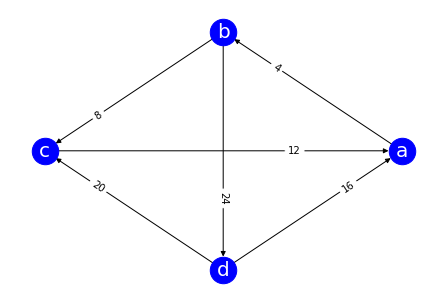

In [4]:
a=0
b=1
c=2
d=3
rankings = [(a, b, c, d),
(a, b, d, c),
(c, a, b, d),
(c, a, d, b),
(a, c, b, d),
(a, c, d, b),
(d, a, b, c),
(d, a, c, b),
(a, d, b, c),
(a, d, c, b),
(a, b, c, d),
(a, b, d, c),
(b, a, c, d),
(b, a, d, c),
(b, c, a, d),
(b, c, d, a),
(b, d, a, c),
(b, d, c, a),
(c, a, b, d),
(c, a, d, b),
(b, c, a, d),
(b, c, d, a),
(c, b, a, d),
(c, b, d, a),
(d, c, a, b),
(d, c, b, a),
(c, d, a, b),
(c, d, b, a),
(d, a, b, c),
(d, a, c, b),
(b, d, a, c),
(b, d, c, a),
(d, b, a, c),
(d, b, c, a),
(d, c, a, b),
(d, c, b, a)]

num_cands = 4
rcounts = [6, 6, 3, 3, 3, 3, 4, 4, 2, 2, 1, 1, 5, 5, 6, 6, 6, 6, 6, 6, 2, 2, 4, 4, 5, 5, 1, 1, 6, 6, 6, 6, 0, 0, 6, 6]

cmap = {a:"a", b:"b", c:"c", d:"d"}
prof = Profile(rankings, num_cands, rcounts=rcounts, cmap=cmap)

prof.display()

prof.display_margin_graph()

+---+---+---+---+---+---+---+---+---+
| 6 | 6 | 0 | 2 | 4 | 6 | 6 | 4 | 2 |
+---+---+---+---+---+---+---+---+---+
| a | c | a | a | b | b | c | b | c |
| b | a | c | b | a | c | a | c | b |
| c | b | b | c | c | a | b | a | a |
+---+---+---+---+---+---+---+---+---+


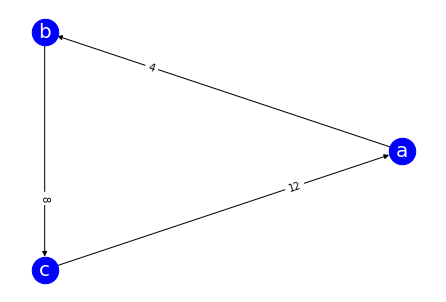

17

In [5]:
a=0
b=1
c=2
rankings = [
    (a, b, c), 
    (c, a, b), 
    (a, c, b), 
    (a, b, c), 
    (b, a, c), 
    (b, c, a), 
    (c, a, b), 
    (b, c, a), 
    (c, b, a)
]

num_cands = 3
rcounts = [6, 6, 0, 2, 4, 6, 6, 4, 2]

cmap = {a:"a", b:"b", c:"c"}
prof = Profile(rankings, num_cands, rcounts=rcounts, cmap=cmap)

prof.display()

prof.display_margin_graph()

19

17

+----+---+---+---+----+----+----+---+---+
| 12 | 6 | 6 | 2 | 10 | 12 | 12 | 4 | 8 |
+----+---+---+---+----+----+----+---+---+
| a  | c | a | a | b  | b  | c  | b | c |
| b  | a | c | b | a  | c  | a  | c | b |
| c  | b | b | c | c  | a  | b  | a | a |
+----+---+---+---+----+----+----+---+---+


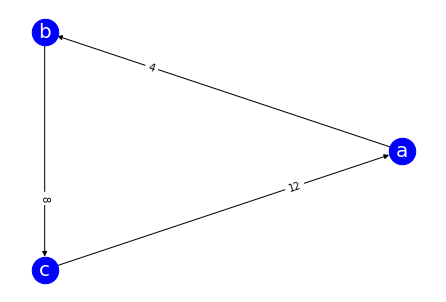

In [6]:
a=0
b=1
c=2
rankings = [
    (a, b, c), 
    (c, a, b), 
    (a, c, b), 
    (a, b, c), 
    (b, a, c), 
    (b, c, a), 
    (c, a, b), 
    (b, c, a), 
    (c, b, a)
]

num_cands = 3
rcounts = [12, 6, 6, 2, 10, 12, 12, 4, 8]

cmap = {a:"a", b:"b", c:"c"}
prof = Profile(rankings, num_cands, rcounts=rcounts, cmap=cmap)

prof.display()

prof.display_margin_graph()

In [7]:
rankings = [
    (0, 1, 2, 3), 
    (2, 3, 1, 0), 
    (3, 1, 2, 0), 
    (1, 2, 0, 3), 
    (1, 3, 2, 0)
]
num_cands = 4
prof = Profile(rankings, num_cands)

prof.display()
print("")
print(f"The plurality scores are ", prof.plurality_scores())
print(f"The Borda scores are ", prof.borda_scores())
print(f"The Condorcet winner is ", prof.condorcet_winner())
print(f"The weak Condorcet winner is ", prof.weak_condorcet_winner())
print(f"The Condorcet loser is ", prof.condorcet_loser())


+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 3 | 1 | 1 |
| 1 | 3 | 1 | 2 | 3 |
| 2 | 1 | 2 | 0 | 2 |
| 3 | 0 | 0 | 3 | 0 |
+---+---+---+---+---+

The plurality scores are  {0: 1, 1: 2, 2: 1, 3: 1}
The Borda scores are  {0: 4, 1: 11, 2: 8, 3: 7}
The Condorcet winner is  1
The weak Condorcet winner is  [1]
The Condorcet loser is  0


###  Margin Graph

The **margin graph** of a profile $\mathbf{P}$ is a weighted directed graph where the nodes are the candidates and there is an edge from $a$ to $b$ when $Margin_{\mathbf{P}}(a,b)>0,$ weighted by $Margin_{\mathbf{P}}(a,b)$.   

A margin graph for a Profile object is a networkx object. 

<class 'networkx.classes.digraph.DiGraph'>
The nodes are the candidates  [0, 1, 2, 3]
The edges are the majority relations  [(1, 0), (1, 2), (1, 3), (2, 0), (2, 3), (3, 0)]
The weights are the margins 
 Edge (1, 0): {'weight': 3}
 Edge (1, 2): {'weight': 3}
 Edge (1, 3): {'weight': 1}
 Edge (2, 0): {'weight': 3}
 Edge (2, 3): {'weight': 1}
 Edge (3, 0): {'weight': 1}


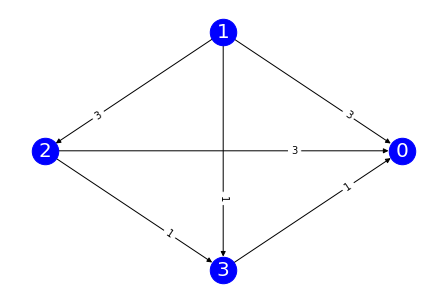

In [8]:

mg = prof.margin_graph()
# mg is a networkx object
print(type(mg))
print("The nodes are the candidates ", mg.nodes)
print("The edges are the majority relations ", mg.edges)
print("The weights are the margins \n", "\n ".join([f"Edge {e}: {mg.get_edge_data(*e)}" for e in mg.edges]))

# display the margin graph
prof.display_margin_graph()


## Removing Candidates

We will need to remove candidates from a profile. 

For a profile $\mathbf{P}$ and $Y\subsetneq X(\mathbf{P})$,  $\mathbf{P}_{-Y}$ is the profile with $V(\mathbf{P}_{-Y})=V(\mathbf{P})$ and $X(\mathbf{P}_{-Y})=X(\mathbf{P})\setminus Y$ such that for all $i\in V(\mathbf{P})$, $\mathbf{P}_{-Y}(i)=\mathbf{P}(i)\cap (X(\mathbf{P})\setminus Y)^2.$  We write $\mathbf{P}_{-b}$ for $\mathbf{P}_{-\{b\}}$. 

Since we assume that candidates are names $0, \ldots, num\_cands - 1$, when removing a candidate, we need a way of mapping the candidate names in the new profile to the candidate names in the old profile. The Profile class method `remove_candidates` returns a restricted profile and a dictionary mapping candidates in the updated profile to the candidates in the original profile. 

In [9]:
rankings = [
    (0, 1, 2, 3), 
    (2, 3, 1, 0), 
    (3, 1, 2, 0), 
    (1, 2, 0, 3), 
    (1, 3, 2, 0)
]
num_cands = 4
prof = Profile(rankings, num_cands)

cands_to_remove = [1,3]
prof_minus, orig_cand_names = prof.remove_candidates(cands_to_remove)

print("Original Profile\n", prof)

print(f"New profile after removing {cands_to_remove}\n")

prof_minus.display() # uses the new candidate names

print("\nUse the original profile names ")
print(f"The candidate map: {orig_cand_names}\n")
prof_minus.display(cmap=orig_cand_names)


Original Profile
 +---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 3 | 1 | 1 |
| 1 | 3 | 1 | 2 | 3 |
| 2 | 1 | 2 | 0 | 2 |
| 3 | 0 | 0 | 3 | 0 |
+---+---+---+---+---+
New profile after removing [1, 3]

+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 1 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+

Use the original profile names 
The candidate map: {0: 0, 1: 2}

+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 2 | 2 | 2 |
| 2 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+


In [10]:
# The same procedure is used when specifying rcounts

rankings = [(0,1,2, 3), (2,3,1,0), (3,1,2,0), (1,2,0,3), (1,3,2,0)]
num_cands = 4
rcounts = [5,3,2,4, 3]

prof = Profile(rankings, num_cands, rcounts=rcounts)

cands_to_remove = [0,2]
prof_minus, orig_cand_names = prof.remove_candidates(cands_to_remove)

print("Original Profile\n", prof)

print(f"New profile after removing {cands_to_remove}\n")

prof_minus.display() # uses the new candidate names

print("\nUse the original profile names ")
print(f"The candidate map: {orig_cand_names}\n")
prof_minus.display(cmap=orig_cand_names)


Original Profile
 +---+---+---+---+---+
| 5 | 3 | 2 | 4 | 3 |
+---+---+---+---+---+
| 0 | 2 | 3 | 1 | 1 |
| 1 | 3 | 1 | 2 | 3 |
| 2 | 1 | 2 | 0 | 2 |
| 3 | 0 | 0 | 3 | 0 |
+---+---+---+---+---+
New profile after removing [0, 2]

+---+---+---+---+---+
| 5 | 3 | 2 | 4 | 3 |
+---+---+---+---+---+
| 0 | 1 | 1 | 0 | 0 |
| 1 | 0 | 0 | 1 | 1 |
+---+---+---+---+---+

Use the original profile names 
The candidate map: {0: 1, 1: 3}

+---+---+---+---+---+
| 5 | 3 | 2 | 4 | 3 |
+---+---+---+---+---+
| 1 | 3 | 3 | 1 | 1 |
| 3 | 1 | 1 | 3 | 3 |
+---+---+---+---+---+


# Generating Profiles

To generate profiles, we use the [Preflib.org](https://preflib.org) tools available at [https://github.com/PrefLib/PrefLib-Tools](https://github.com/PrefLib/PrefLib-Tools).   

We have included  the following probability models: 

1. IC:  Impartial Culture Model - generate a profile by sampling  from a uniform distribution over profiles with $n$ candidates and $m$ voters. 

2. IAC:  Impartial Anonymous Culture Model - generate a profile by sampling  from a uniform distribution over *anonymous* profiles with $n$ candidates and $m$ voters. 

3. URN: Urn model -  In the Polya-Eggenberger urn model, each voter in turn randomly draws a linear order from an urn. Initially the urn is $\mathcal{L}(X)$. If a voter randomly chooses $L$ from the urn, we return $L$ to the urn plus $\alpha\in\mathbb{N}$ copies of $L$. IC is the special case where $\alpha=0$. The Impartial Anonymous Culture (IAC) is the special case where $\alpha=1$. 

4. MALLOWS, MALLOWS_2REFS: Mallows Model - In the Mallow's model, given a reference ranking $L_0\in\mathcal{L}(X)$ and $\phi\in (0,1]$, the probability that a voter's ballot is $L\in\mathcal{L}(X)$ is $Pr_{L_0}(L)=\phi^{\tau(L,L_0)}/C$ where $\tau(L,L_0)= {{|X|}\choose{2}} - |L\cap L_0|$, the Kendell-tau distance of $L$ to $L_0$, and $C$ is a normalization constant.   IC is the special case where $\alpha=1$.  We also considered two reference rankings, $L_0$ and its converse $L_0^{-1}$ (e.g., $L_0$ ranks candidates from more liberal to more conservative, and $L_0^{-1}$ vice versa), in which case the probability that a voter's ballot is $L$ is $\frac{1}{2} Pr_{L_0}(L)+\frac{1}{2}Pr_{L_0^{-1}}(L)$. 

5. SinglePeaked - a profile $\mathbf{P}$ is *single peaked* if there exists a strict linear order $<$ of $X(\mathbf{P})$ such that for every $i\in V(\mathbf{P})$ and $x,y\in X(\mathbf{P})$, $x<y < max(\mathbf{P}_i)$ implies  $y\mathbf{P}_ix$, and $max(\mathbf{P}_i)< x<y$ implies $x\mathbf{P}_iy$. The probability model we call *single peaked* assigns zero probability to any profile that is not single peaked and equal probability to any two single-peaked profiles. 

In addition to the probability models from preflib, we have implemented the spatial model described in Section 2.1 of Merrill and Grofman 1999: 

6. SPATIAL: Spatial Model -  We used the so-called proximity spatial model where voters and candidates are placed in the plane according to a multivariate normal distribution with mean $\begin{bmatrix} 0 \\ 0  \end{bmatrix}$ and covariance matrix  $\begin{bmatrix} 1 & 0 \\ 0 & 1  \end{bmatrix}$.  The voters rank the candidates accodring to  their Euclidean distance from the voter.



In [11]:
from voting.generate_profiles import generate_profile # function to generate a profile

# dictionary where keys are the names of the probability models and 
# values is a dictionary with two keys: "func" giving the function to generate a profile
# and "param" giving the default parameter for the profile

from voting.generate_profiles import prob_models 

In [12]:

num_cands = 3
num_voters = 5

# generate and display a profile for each probability model
# consult voting/generate_profiles.py for more details about 
# generating profiles
for pm in prob_models.keys():
    print(f"Profile generated using the {pm} probability model")
    prof = generate_profile(num_cands, num_voters, probmod=pm)
    prof.display()
    print("\n")

Profile generated using the IC probability model
+---+---+---+
| 2 | 2 | 1 |
+---+---+---+
| 2 | 0 | 2 |
| 0 | 2 | 1 |
| 1 | 1 | 0 |
+---+---+---+


Profile generated using the IAC probability model
+---+---+---+---+
| 1 | 2 | 1 | 1 |
+---+---+---+---+
| 0 | 2 | 0 | 2 |
| 2 | 1 | 1 | 0 |
| 1 | 0 | 2 | 1 |
+---+---+---+---+


Profile generated using the MALLOWS probability model
+---+---+---+
| 2 | 2 | 1 |
+---+---+---+
| 2 | 0 | 1 |
| 1 | 2 | 2 |
| 0 | 1 | 0 |
+---+---+---+


Profile generated using the MALLOWS_2REF probability model
+---+---+---+---+
| 1 | 2 | 1 | 1 |
+---+---+---+---+
| 0 | 1 | 0 | 2 |
| 1 | 2 | 2 | 1 |
| 2 | 0 | 1 | 0 |
+---+---+---+---+


Profile generated using the URN probability model
+---+
| 5 |
+---+
| 1 |
| 0 |
| 2 |
+---+


Profile generated using the SinglePeaked probability model
+---+---+---+
| 1 | 3 | 1 |
+---+---+---+
| 2 | 1 | 1 |
| 1 | 2 | 0 |
| 0 | 0 | 2 |
+---+---+---+


Profile generated using the SPATIAL probability model
+---+---+---+
| 3 | 1 | 1